Make sure you remove `raise NotImplementedError()` and fill in any place that says `# YOUR CODE HERE`, as well as your `NAME`, `ID`, and `SECTION` below:

In [1]:
NAME = "Sadman Sharif"
ID = "20101107"
SECTION = "7"

---

# Fixed Point Iteration

### Fixed point:
A number $\xi$ is called a **fixed point** to function $g(x)$ if $g(\xi) = \xi$. Using fixed points are a nice strategy to find roots of an equation. In this method if we are trying to find a root of $f(x) = 0$, we try to write the function in the form, $x = g(x)$. That is,
$$
f(x) = x - g(x) = 0
$$

So, if $\xi$ is a fixed point of $g(x)$ it would also be a root of $f(x)=0$, because,
$$
f(\xi) = \xi - g(\xi) = \xi - \xi = 0
$$

We can find a suitable $g(x)$ in any number of ways. Not all of them would converge; whereas, some would converge very fast. For example, consider $Eq. 6.1$.

\begin{align}
&         &    f(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &x - g(x) &=x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 \\
&\implies &    g(x) &=-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2 \tag{6.2}\\
\end{align}

again, 
$$
f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2 = 0\\
$$
\begin{align}
&\implies &6x^2 &= x^5 + 2.5x^4 - 2x^3 + x + 2 \\
&\implies &x^2  &= \frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)\\
&\implies &x    &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\\
&\implies &g(x) &= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 - 2x^3 + x + 2)}\tag{6.3}\\
\end{align}

Similarly,
\begin{align}
&         &2.5x^4 &= -x^5 + 2x^3 + 6x^2 - x - 2 \\
&\implies &x^4  &= \frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)\\
&\implies &x    &= \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\\
&\implies &g(x) &= \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - x - 2)}\tag{6.4}\\
\end{align}

### B. Complete the code below
For this example we will use a couple of $g(x)$ function to find out which one converges faster.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

f = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
g1 = Polynomial([-2.0, 0.0, 6.0, 2.0, -2.5, -1.0])

def g2(x):
    p = Polynomial([2.0, 1.0, 0.0, -2.0, 2.5, 1.0])
    return np.sqrt(p(x)/6)

def g3(x):
    p = Polynomial([-2.0, -1.0, 6.0, 2.0, 0.0, -1.0])
    return np.power(p(x)/2.5, 1.0/4.0)

a1 = 0.8
g1_a = []

a2 = 0.8
g2_a = []

a3 = 0.8
g3_a = []

# YOUR CODE HERE
err=0.1E-6
temp=True
while temp: 
    a2=g2(a2)
    g2_a.append(a2)
    a1=g1(a1)
    g1_a.append(a1)
    a3=g3(a3)
    g3_a.append(a3)
    temp=abs(f(a1))>err or abs(f(a3))>err or abs(f(a2))>err 

In [3]:
xs = np.linspace(-2.5, 1.6, 100)
ys = f(xs)
dictionary = {
    'x': xs,
    'y': ys
}

<ipython-input-2-40240070c2eb>:15: RuntimeWarning: invalid value encountered in power
  return np.power(p(x)/2.5, 1.0/4.0)


       g1(x)     g2(x)    g3(x))
0   1.512320  0.721997  0.912898
1  -2.347605  0.688573  1.044444
2   0.562201  0.677301  1.160638
3  -0.054108  0.673860  1.241682
4  -1.982772  0.672844  1.288278
5  -1.995936  0.672547  1.311548
6  -1.999770  0.672460  1.322205
7  -1.999999  0.672435  1.326870
8  -2.000000  0.672427  1.328868
9  -2.000000  0.672425  1.329716
10 -2.000000  0.672425  1.330075
11 -2.000000  0.672424  1.330226
12 -2.000000  0.672424  1.330290
13 -2.000000  0.672424  1.330317
14 -2.000000  0.672424  1.330328
15 -2.000000  0.672424  1.330333
16 -2.000000  0.672424  1.330335
17 -2.000000  0.672424  1.330336
18 -2.000000  0.672424  1.330336
19 -2.000000  0.672424  1.330336
20 -2.000000  0.672424  1.330336
21 -2.000000  0.672424  1.330336
22 -2.000000  0.672424  1.330336
23 -2.000000  0.672424  1.330336


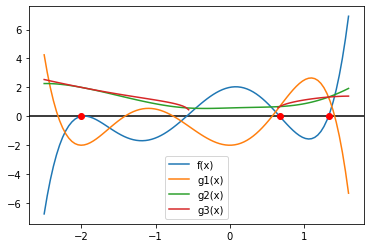

In [4]:
# Test case:
plt.axhline(y=0, color='k')
plt.plot(xs, f(xs), label='f(x)')
plt.plot(xs, g1(xs), label='g1(x)')
plt.plot(xs, g2(xs), label='g2(x)')
plt.plot(xs, g3(xs), label='g3(x)')
plt.legend()

if len(g1_a) > 0:
    root = np.array([g1_a[len(g1_a)-1], g2_a[len(g2_a)-1], g3_a[len(g3_a)-1]])
    plt.plot(root, f(root), 'ro')
    
print(pd.DataFrame({'g1(x)':g1_a, 'g2(x)':g2_a, 'g3(x))':g3_a,}))
